<a href="https://colab.research.google.com/github/candybains/Candy/blob/master/Carbon_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import math
import random
import os
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None
from matplotlib import pyplot as plt
import seaborn as sns
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
#!pip install scikit-learn==1.3.1



In [2]:
# Load files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
samplesubmission = pd.read_csv('/content/sample_submission.csv')

# Preview train dataset
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732


In [133]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,location
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,8472.31348,41047.93750,7472.31348,7.93562,0.24077,-100.11379,33.69704,-133.04755,33.77958,-0.51_29.29
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,6476.14732,54915.70858,5476.14716,11.44844,0.29312,-30.51032,42.40259,-138.63282,31.01238,-0.51_29.29
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,8984.79570,39006.09375,7984.79570,10.75318,0.26713,39.08736,45.93648,-144.78499,26.74336,-0.51_29.29
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,6014.72406,57646.36837,5014.72412,11.76456,0.30468,-24.46513,42.14042,-135.02789,29.60477,-0.51_29.29
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,6849.28048,52896.54187,5849.28039,13.06532,0.28422,-12.90785,30.12264,-135.50012,26.27681,-0.51_29.29


In [4]:
train.shape, test.shape, samplesubmission.shape

((79023, 76), (24353, 75), (24353, 2))

In [5]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [6]:
train.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023,79023.00000,79023.00000,79023.00000,79023.00000,64414.00000,64414.00000,64414.00000,64414.00000,64414.00000,...,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,79023.00000
unique,79023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-3.299_30.301_2021_52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.89107,29.88015,2020.00000,26.00000,0.00005,0.83485,0.00004,0.15842,-7.92587,...,5592.37748,59420.29746,4670.43087,19.13924,0.27146,-10.78483,40.43698,-86.80058,27.92598,81.94055
std,NaN,0.69452,0.81038,0.81650,15.29716,0.00027,0.18538,0.00021,0.07136,64.26337,...,1428.50300,9051.16361,1359.25158,13.54705,0.04943,30.37446,6.42822,37.83727,4.40384,144.29965
min,NaN,-3.29900,28.22800,2019.00000,0.00000,-0.00100,0.24182,-0.00089,0.00000,-179.53706,...,1050.66178,24779.03370,1050.49682,1.84453,0.01770,-102.73973,2.99887,-153.46421,10.81829,0.00000
25%,NaN,-2.45100,29.26200,2019.00000,13.00000,-0.00010,0.70582,-0.00008,0.11053,-56.78238,...,4595.40052,53175.77993,3680.85634,9.97457,0.24145,-30.30917,35.82991,-125.99116,24.68676,9.79800
50%,NaN,-1.88200,29.88300,2020.00000,26.00000,0.00002,0.80912,0.00002,0.16185,-12.44173,...,5573.85431,59332.53255,4621.75517,15.13069,0.27275,-12.67391,41.11963,-84.64435,28.33363,45.59345
75%,NaN,-1.30300,30.47100,2021.00000,39.00000,0.00015,0.94279,0.00012,0.21182,72.05999,...,6542.30364,65663.84268,5572.98322,23.78503,0.30289,9.40220,44.44627,-48.13270,31.49988,109.54959


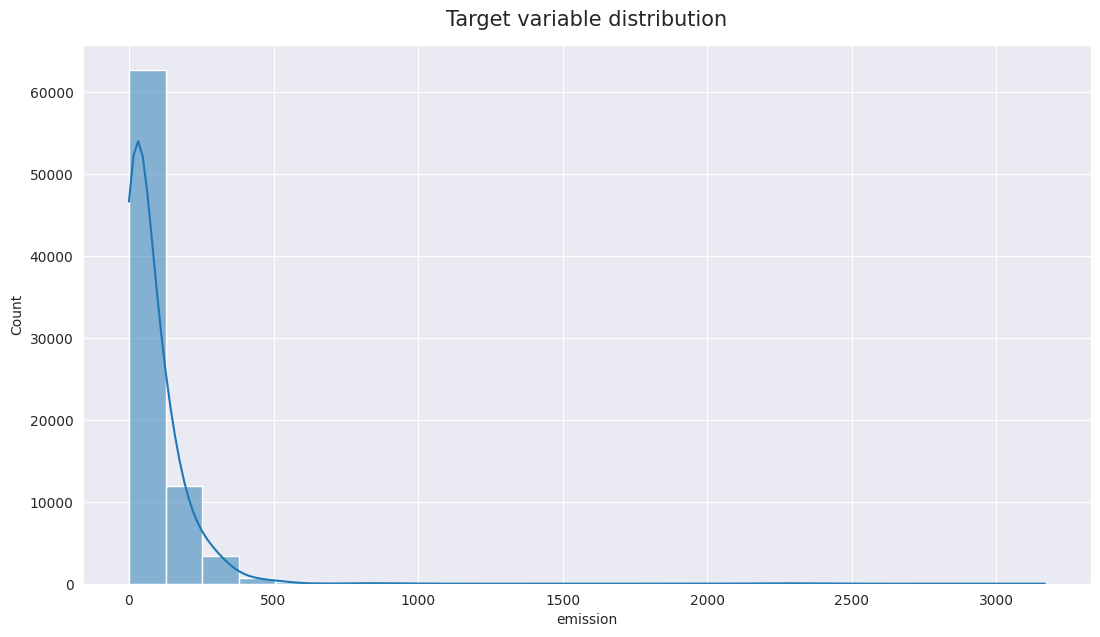

None

10.173825825101622

Skewness: 10.173826
Kurtosis: 157.568167


In [7]:
#Kernel density estimate
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, kde_kws=dict(bw_adjust=3), bins = 25)

plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())
print("Skewness: %f" % train.emission.skew())
print("Kurtosis: %f" % train.emission.kurt())

In [20]:
train.groupby("year")["emission"].mean()

,emission
year,
2019,87.25532
2020,75.99212
2021,82.57422


<Figure size 1300x700 with 0 Axes>

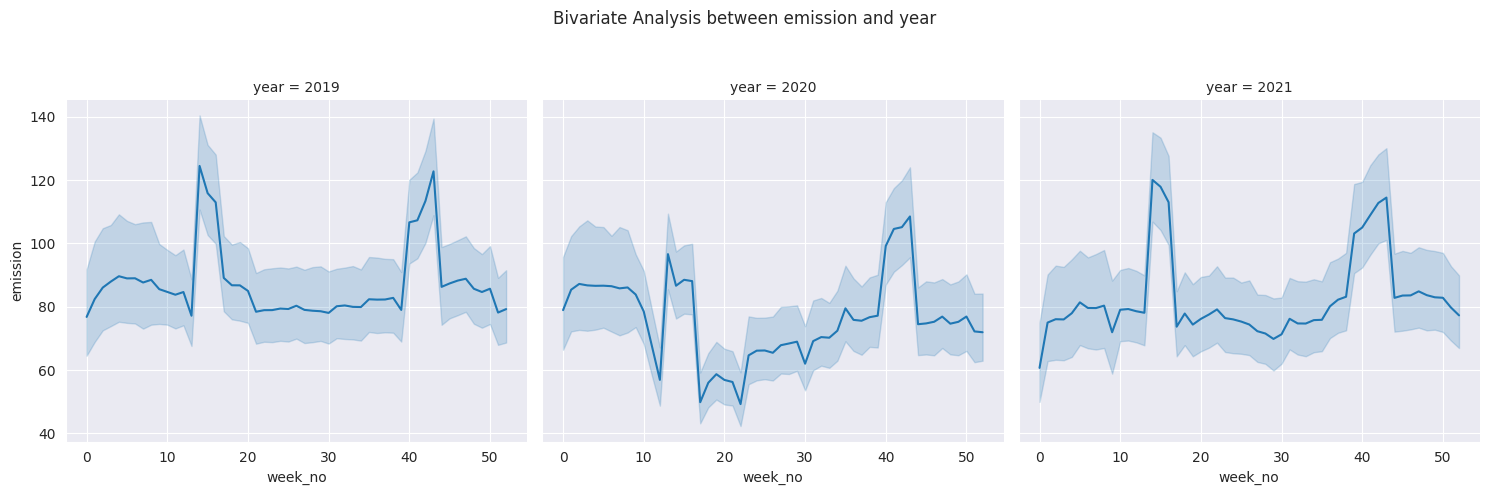

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize = (13, 7))
plot = sns.relplot(data = train, x = "week_no", y = "emission", col = "year", kind = "line", legend = False)
plot.figure.subplots_adjust(top=0.8);
plot.fig.suptitle("Bivariate Analysis between emission and year")
plt.show()

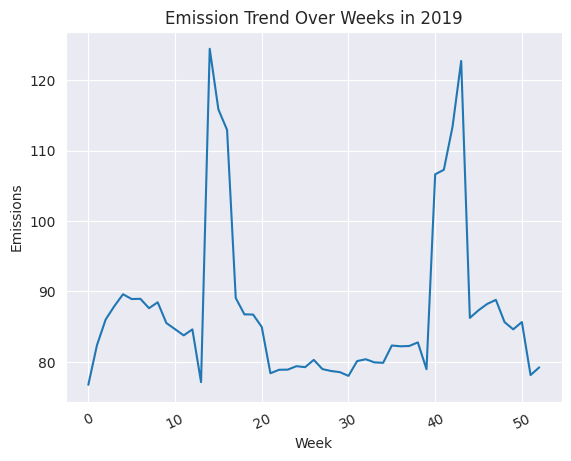

In [8]:
fil_data_2019 = train[train['year'] == 2019]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2019, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2019')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

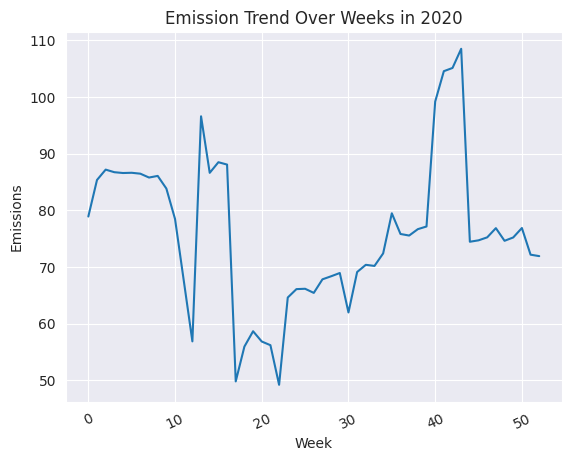

In [9]:
fil_data_2020 = train[train['year'] == 2020]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2020, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2020')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

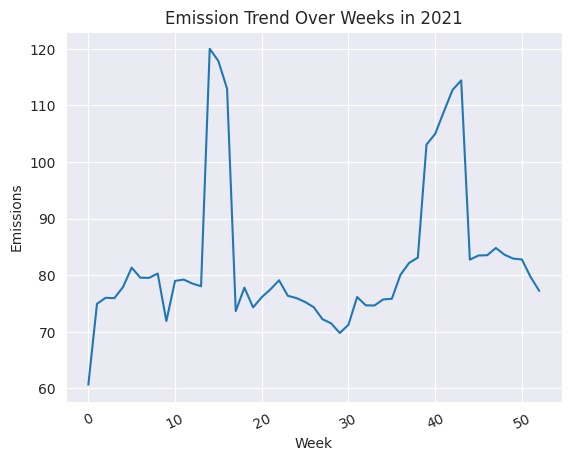

In [10]:
fil_data_2021 = train[train['year'] == 2021]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2021, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2021')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

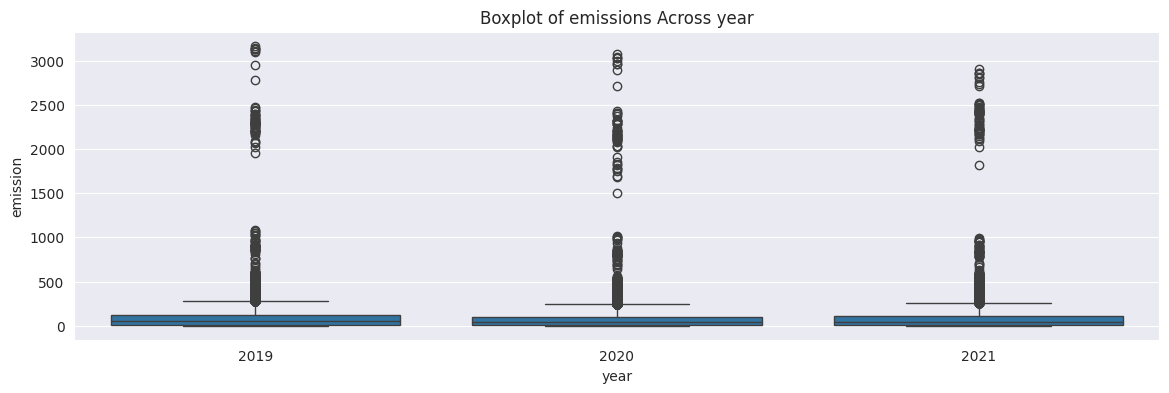

In [11]:
fig, ax = plt.subplots(figsize=(14, 4))
data=train.copy()
sns.boxplot(x='year', y='emission', data=data, ax=ax)
ax.set_title(f'Boxplot of emissions Across year')
plt.show()

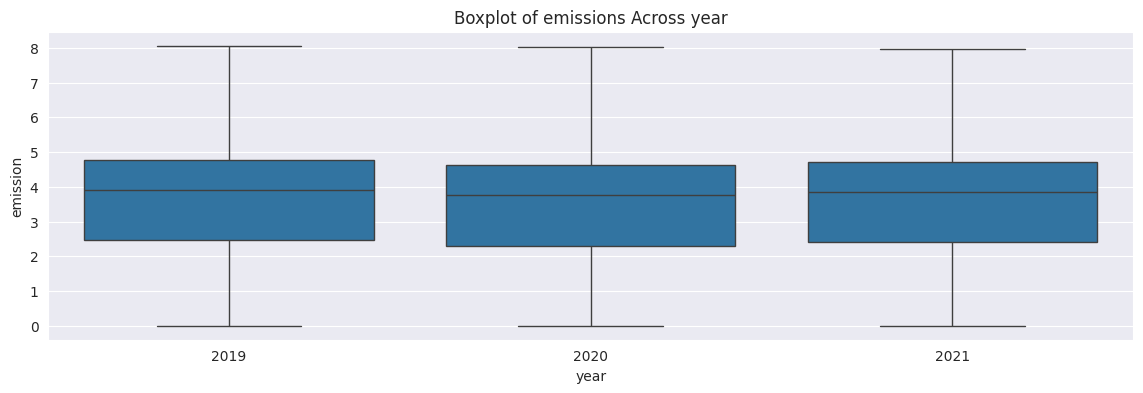

In [12]:
data=train.copy()

#data['emission']=np.where(data['year']!=2019,data['emission']*1.10,data['emission'])
fig, ax = plt.subplots(figsize=(14, 4))
data=train.copy()
data['emission']=np.log1p(data['emission'])
sns.boxplot(x='year', y='emission', data=data, ax=ax)
ax.set_title(f'Boxplot of emissions Across year')
plt.show()

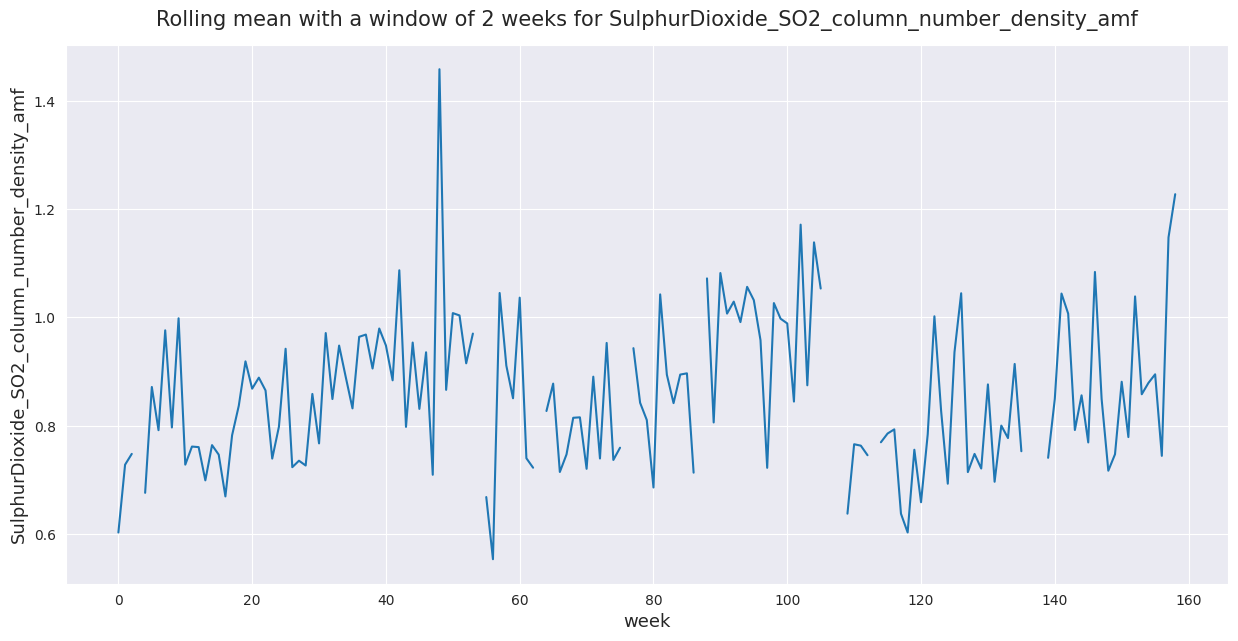

In [13]:
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-0.51_29.29']

# Calculate rolling mean for SulphurDioxide_SO2_column_number_density_amf with a window of 2 weeks
col_value = example_loc['SulphurDioxide_SO2_column_number_density_amf']

# Visualise rolling mean
plt.figure(figsize = (15, 7))
col_value.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

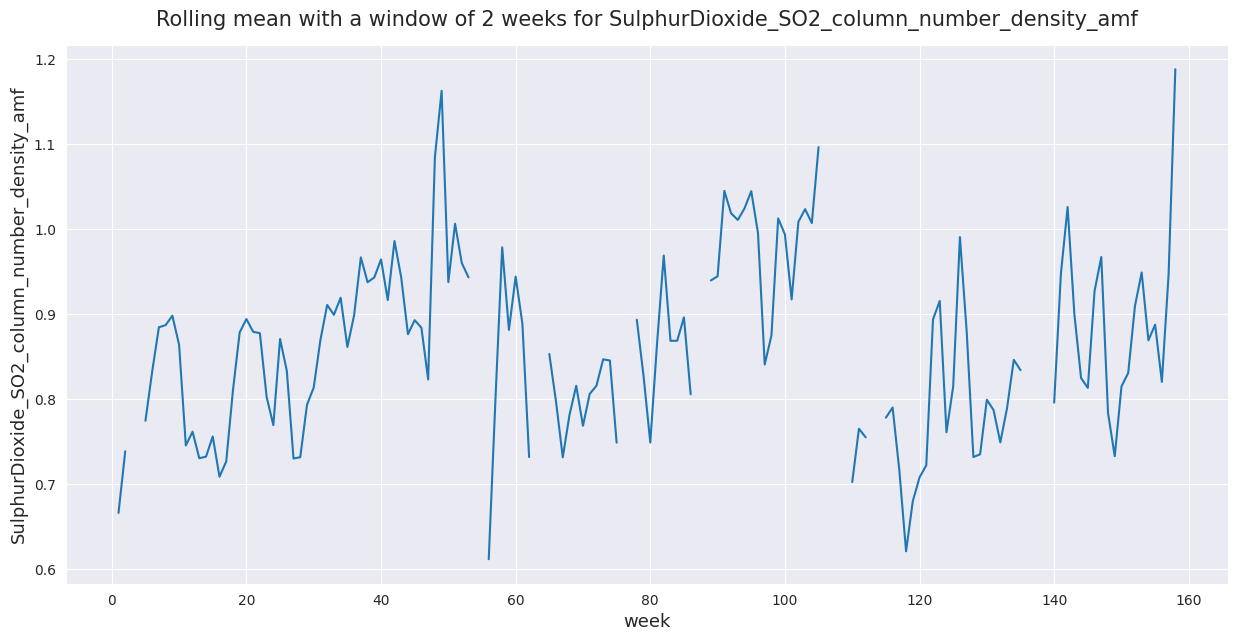

In [14]:
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-0.51_29.29']

# Calculate rolling mean for SulphurDioxide_SO2_column_number_density_amf with a window of 2 weeks
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()

# Visualise rolling mean
plt.figure(figsize = (15, 7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

In [16]:
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]
print(train_roll_mean.shape)
train_roll_mean.head()

(79023, 70)


,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.00004,0.66562,-0.00003,0.19333,-41.00051,44.99038,-135.46262,32.41981,-0.00001,0.03595,...,58662.51433,3657.81326,64027.64415,2894.84645,12.12957,0.26456,8.86519,37.59502,-141.98518,29.00196
2,0.00027,0.73821,0.00020,0.12050,44.69435,46.00301,-145.53310,26.08577,0.00008,0.03593,...,59857.04340,3934.08840,63519.18659,3345.42755,14.89701,0.25397,22.86863,34.97973,-143.85174,26.72254
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03606,...,50246.46059,4722.74711,55566.72089,3848.62800,18.24515,0.25657,2.04224,27.39109,-137.59269,27.51123
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03573,...,52236.72274,4604.55293,57407.83656,3768.34171,11.75080,0.24894,13.61943,30.88667,-137.08782,25.51688


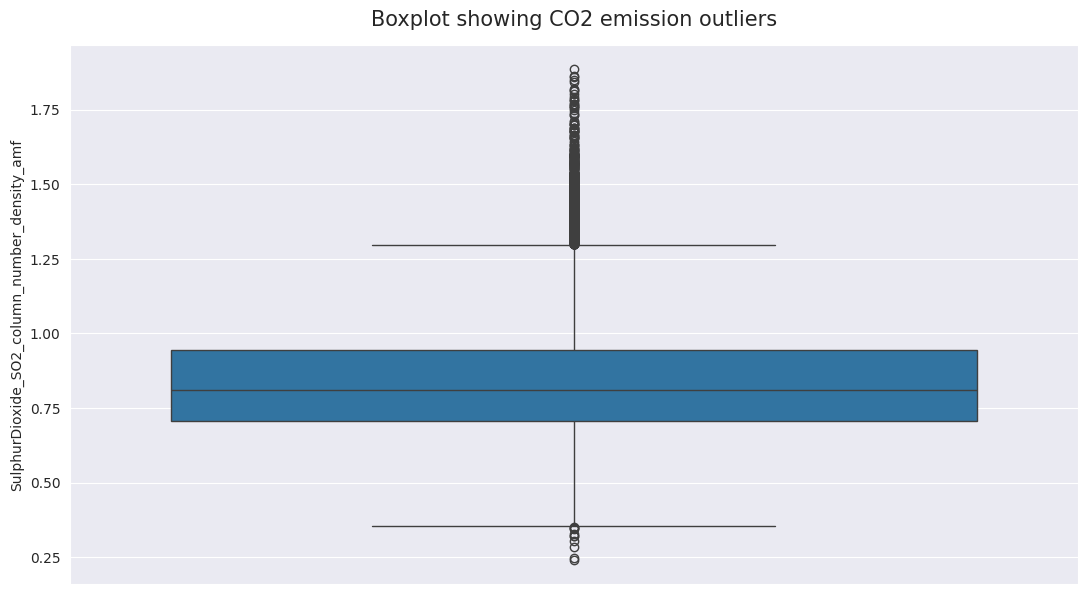

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.SulphurDioxide_SO2_column_number_density_amf)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)
plt.show()

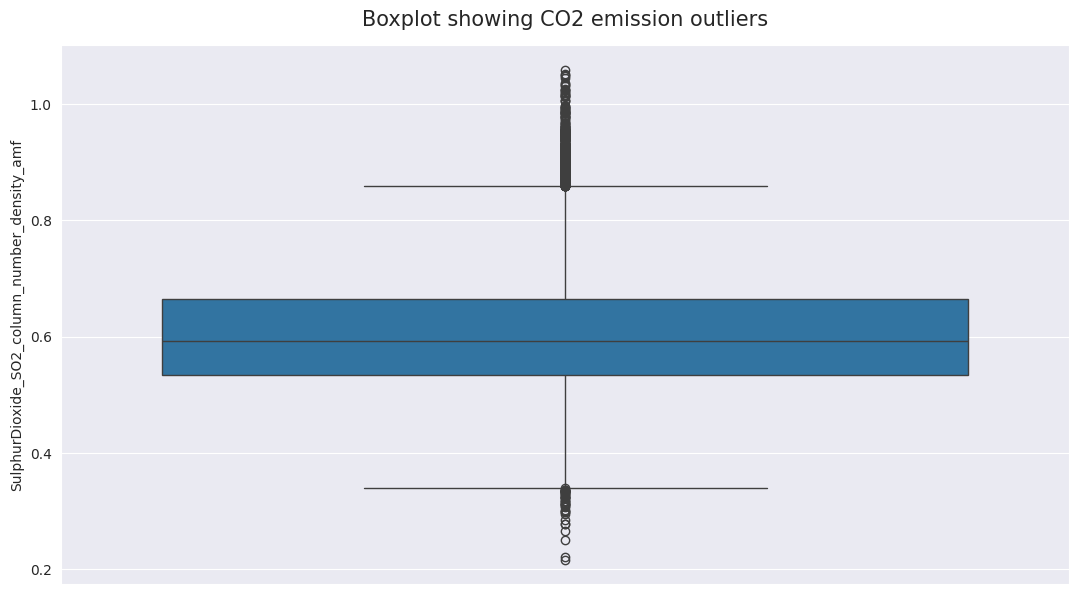

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(np.log1p(train.SulphurDioxide_SO2_column_number_density_amf))
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)
plt.show()

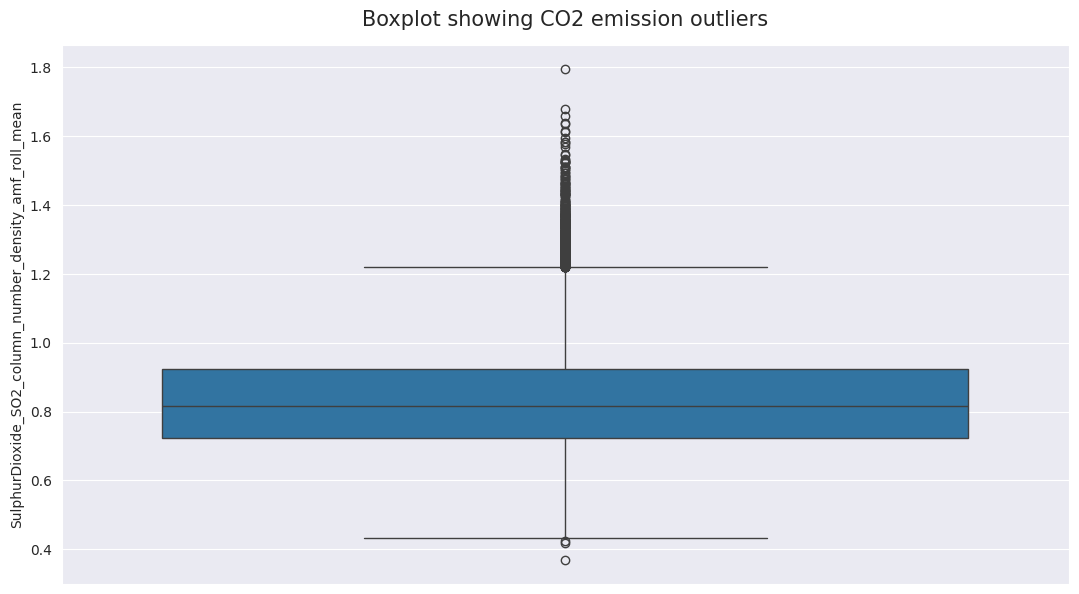

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train_roll_mean.SulphurDioxide_SO2_column_number_density_amf_roll_mean)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)
plt.show()

In [30]:
test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]

test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns = [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()

,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,0.00031,0.64814,0.00021,0.03993,17.09193,27.74483,-138.71941,29.47540,0.00011,0.03772,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,0.00026,0.65101,0.00017,0.14045,15.05711,49.37580,-144.95421,25.93065,0.00007,0.03877,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,0.00002,0.63872,0.00003,0.20269,74.18022,37.25428,-144.39710,23.06746,0.00001,0.03949,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [31]:
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Test
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Preview engineered test set
train_eng.shape

(79023, 147)

In [32]:
X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y = train_eng.emission

X.shape, y.shape

((79023, 144), (79023,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=2023)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
print(f'RMSE Score: {math.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Score: 27.466738059317613


In [36]:
#only original columns (no rollins mean)
X_noMean = train.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y_noMean = train.emission

X_noMean.shape, y_noMean.shape
XnoMean_train, XnoMean_test, ynoMean_train, ynoMean_test = train_test_split(X_noMean, y_noMean, test_size = 0.3, random_state = SEED)

XnoMean_train.shape

(55316, 74)

In [37]:
# Instantiating the model
clf_noMean = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf_noMean.fit(XnoMean_train, ynoMean_train)

RandomForestRegressor(n_jobs=-1, random_state=2023)

In [39]:
yNoMean_pred = clf_noMean.predict(XnoMean_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(ynoMean_test, yNoMean_pred))}')

RMSE Score: 21.722555186967973


In [43]:
#only rolling mean columns
X_Mean = train_roll_mean.fillna(0)
y_Mean = train.emission

X_Mean.shape, y_Mean.shape
X_Mean_train, X_Mean_test, y_Mean_train, y_Mean_test = train_test_split(X_Mean, y_Mean, test_size = 0.3, random_state = SEED)

X_Mean_train.shape

(55316, 70)

In [44]:
clf_Mean = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf_Mean.fit(X_Mean_train, y_Mean_train)

RandomForestRegressor(n_jobs=-1, random_state=2023)

In [45]:
y_Mean_pred = clf_Mean.predict(X_Mean_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(y_Mean_test, y_Mean_pred))}')

RMSE Score: 147.18384039602898


In [46]:
X_test.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
42962,-1.96800,30.93200,2019,32,-0.00031,0.71053,-0.00022,0.05047,16.57960,45.51030,...,57419.29103,5330.79123,61552.54148,4654.78256,10.79548,0.24813,-31.46791,47.36010,-49.75059,28.81543
20489,-1.32700,30.97300,2021,31,-0.00005,0.83240,-0.00004,0.10846,17.56284,35.96635,...,61520.93314,4065.66013,69494.58153,3112.44794,10.74455,0.21591,6.19150,43.89503,-43.85110,28.08377
49300,-2.17100,28.62900,2019,10,0.00008,0.82463,0.00006,0.09100,74.80393,32.09079,...,48901.16490,4626.37383,54412.81630,3896.92843,24.60350,0.26977,-2.84187,38.80104,-98.31160,19.79850
13289,-1.11700,29.88300,2020,39,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,52079.15598,5787.26982,58881.23696,4798.99914,28.16117,0.26420,10.87889,40.55605,-92.68547,23.21665
31375,-1.64100,31.25900,2019,52,0.00004,0.75535,0.00003,0.22451,75.46359,25.12664,...,44224.48788,7041.88831,50164.00427,6057.84949,15.27048,0.26619,11.59058,37.11346,-140.04970,29.57884


In [47]:
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
46437,-2.07900,29.32100,2019,9,1044.48450,2920.63175,1876.14725
46490,-2.07900,29.32100,2020,9,1011.02600,2796.30855,1785.28255
56674,-2.37800,29.22200,2020,17,1502.66770,2071.40093,568.73323
56679,-2.37800,29.22200,2020,22,1689.61380,2213.16714,523.55334
56671,-2.37800,29.22200,2020,14,1777.71030,2245.37519,467.66489


In [48]:
pred_errors.tail()

,latitude,longitude,year,week_no,emission,prediction,error
71905,-2.85900,29.04100,2019,37,0.00000,0.00000,0.00000
72919,-2.89800,29.00200,2020,44,0.00000,0.00000,0.00000
32207,-1.68200,29.21800,2020,36,0.00000,0.00000,0.00000
70868,-2.84100,29.15900,2021,7,0.00000,0.00000,0.00000
33290,-1.71200,28.68800,2020,6,0.00000,0.00000,0.00000


In [49]:

param = {
   'n_estimators':100,
    'max_depth': 20,
    'learning_rate': 0.047,
    'colsample_bytree': 0.9,
    'subsample': 0.6085,
    'min_child_weight': 9,
    'reg_lambda': 4.879e-07,
    'max_bin': 431,
    'n_jobs': -1,
    'eval_metric': 'rmse',
    'objective': "reg:squarederror",
    'verbosity': 0,
    'random_state': 0,
    'tree_method' : 'approx'

    }


model = xgb.XGBRegressor(**param)
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.047, max_bin=431,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)

In [51]:
y_xgb_pred = model.predict(X_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(y_test, y_xgb_pred))}')

RMSE Score: 22.078471430577085


In [52]:
model_noMean = xgb.XGBRegressor(**param)
model_noMean.fit(XnoMean_train, ynoMean_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.047, max_bin=431,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)

In [54]:
ynoMean_xgb_pred = model_noMean.predict(XnoMean_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(ynoMean_test, ynoMean_xgb_pred))}')

RMSE Score: 18.29279432934744


In [ ]:
https://www.kaggle.com/code/arunklenin/ps3e20-co2-emissions-prediction-regression#6.1-Model-Selection
https://www.kaggle.com/code/nazimcherpanov/prediction-emissions-in-rwanda-using-lgbm
https://www.kaggle.com/code/mukilankrishnakumar/exploratory-data-analysis-eda

In [126]:
lgb_params = {
            'n_estimators': 500,
            'max_depth': 25,
            "num_leaves": 45,
            'learning_rate': 0.1,
            #'subsample': 0.7,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'random_state': 0,
            #'subsample': 0.3,
            'reg_lambda' : 0.001,
            #'colsample_bytree' : 0.5,
            'force_col_wise':True
        }

lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model.fit(XnoMean_train, ynoMean_train)


[LightGBM] [Info] Total Bins 17406
[LightGBM] [Info] Number of data points in the train set: 55316, number of used features: 74
[LightGBM] [Info] Start training from score 82.257010


LGBMRegressor(force_col_wise=True, max_depth=25, metric='mean_squared_error',
              n_estimators=500, num_leaves=45, objective='regression_l2',
              random_state=0, reg_lambda=0.001)

In [127]:
y_lgb_pred = lgb_model.predict(XnoMean_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(ynoMean_test, y_lgb_pred))}')

RMSE Score: 18.686027300852732


In [166]:
lgb_m_model = lgb.LGBMRegressor(**lgb_params)
lgb_m_model.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 33558
[LightGBM] [Info] Number of data points in the train set: 55316, number of used features: 143
[LightGBM] [Info] Start training from score 82.232688


LGBMRegressor(force_col_wise=True, max_depth=25, metric='mean_squared_error',
              n_estimators=500, num_leaves=45, objective='regression_l2',
              random_state=0, reg_lambda=0.001)

In [167]:
y_lgb_m_pred = lgb_m_model.predict(X_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(y_test, y_lgb_m_pred))}')

RMSE Score: 23.527741594887505


In [128]:
hist_model = HistGradientBoostingRegressor(max_iter=5000, learning_rate=0.01, loss="squared_error",  n_iter_no_change=100, random_state=0)
hist_model.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.01, max_iter=5000,
                              n_iter_no_change=100, random_state=0)

In [129]:
y_hist_pred = hist_model.predict(X_test)
print(f'RMSE Score: {math.sqrt(mean_squared_error(y_test, y_hist_pred))}')

RMSE Score: 21.5370427219965


In [ ]:
#pip install SuperTree

In [ ]:
# from supertree import SuperTree

# st = SuperTree(
#     model,
#     X,
#     y
# )
# # Visualize the tree
# st.show_tree(which_tree=1)

In [132]:
test_df.shape, test_eng.shape

((24353, 144), (24353, 146))

In [170]:
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)
test_noMean_df = test.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)
predictions_rr = clf.predict(test_df)
predictions_xgb = model.predict(test_df)
predictions_xgb_noMean = clf_noMean.predict(test_noMean_df)
predictions_lgb = lgb_model.predict(test_noMean_df)
predictions_lgb_m = lgb_m_model.predict(test_df)
predictions_hgb = hist_model.predict(test_df)


In [ ]:
# # Create a submission file
# sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test_eng.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
# sub_file.head()
#sub_file.to_csv('BaselineSubmission.csv', index = False)

In [171]:
test_rr_df = pd.concat([test_df, pd.DataFrame(predictions_rr, columns=['RR_Emission'])], axis=1)
test_rr_df = pd.concat([test_rr_df, pd.DataFrame(predictions_xgb, columns=['XGB_Emission'])], axis=1)
test_rr_df = pd.concat([test_rr_df, pd.DataFrame(predictions_xgb_noMean, columns=['XGB_NoMean_Emission'])], axis=1)
test_rr_df = pd.concat([test_rr_df, pd.DataFrame(predictions_lgb, columns=['LGB_NoMean_Emission'])], axis=1)
test_rr_df = pd.concat([test_rr_df, pd.DataFrame(predictions_lgb_m, columns=['LGB_Mean_Emission'])], axis=1)
test_rr_df = pd.concat([test_rr_df, pd.DataFrame(predictions_hgb, columns=['HGB_Emission'])], axis=1)
test_rr_df.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean,RR_Emission,XGB_Emission,XGB_NoMean_Emission,LGB_NoMean_Emission,LGB_Mean_Emission,HGB_Emission
0,-0.51000,29.29000,2022,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,3.66496,-1.91983,3.72013,-1.41170,28.25073,43.89359
1,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,15.60061,...,-65.31206,38.04982,-135.84018,32.39598,4.23507,6.44300,4.26655,-1.77988,3.54589,1.93995
2,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,39.88906,...,4.28852,44.16954,-141.70891,28.87787,4.25249,5.28145,4.17263,-0.36716,0.56369,-2.00274
3,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,58.86254,...,7.31112,44.03845,-139.90644,28.17407,4.33123,5.14583,4.25926,-0.31060,-3.07816,1.02058
4,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,15.64602,...,-18.68649,36.13153,-135.26400,27.94079,4.08988,5.94937,3.73186,-1.95793,2.49912,1.47548


<Axes: xlabel='week_no', ylabel='RR_Emission'>

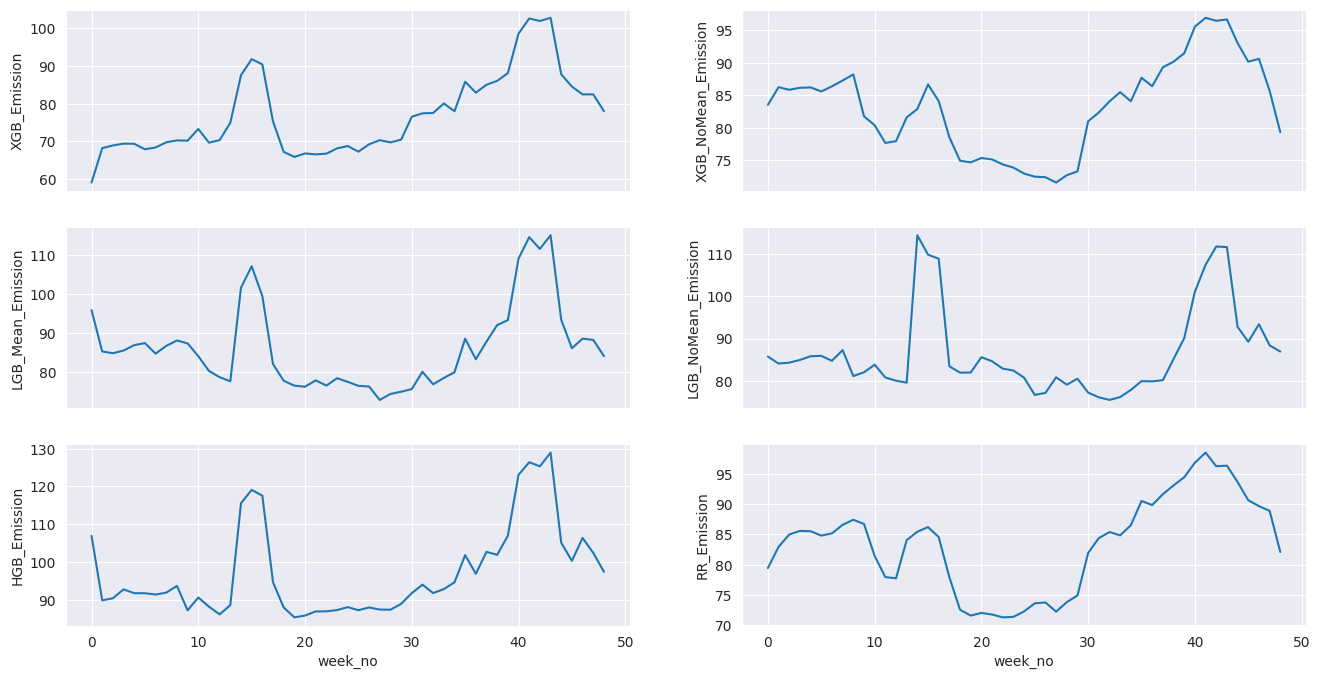

In [185]:
#plot = sns.relplot(data = train, x = "week_no", y = "emission", col = "year", kind = "line", legend = False)
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,8))
sns.lineplot(ax=axes[0,0], data = test_rr_df, x='week_no', y='XGB_Emission', err_style=None)
sns.lineplot(ax=axes[0,1], data = test_rr_df, x='week_no', y='XGB_NoMean_Emission', err_style=None)
sns.lineplot(ax=axes[1,0], data = test_rr_df, x='week_no', y='LGB_Mean_Emission', err_style=None)
sns.lineplot(ax=axes[1,1], data = test_rr_df, x='week_no', y='LGB_NoMean_Emission', err_style=None)
sns.lineplot(ax=axes[2,0], data = test_rr_df, x='week_no', y='HGB_Emission', err_style=None)
sns.lineplot(ax=axes[2,1], data = test_rr_df, x='week_no', y='RR_Emission', err_style=None)
# plot.figure.subplots_adjust(top=0.8);
# plt.title('Emission Trend Over Weeks in 2022')
# # plt.xticks(rotation=25)
# # plt.xlabel('Week')
# # plt.ylabel('Emissions')
# plt.show()